In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [28]:
FILE_NAME = 'analog_pwm_data_2.txt'

In [29]:
analog_data = pd.read_csv(FILE_NAME)

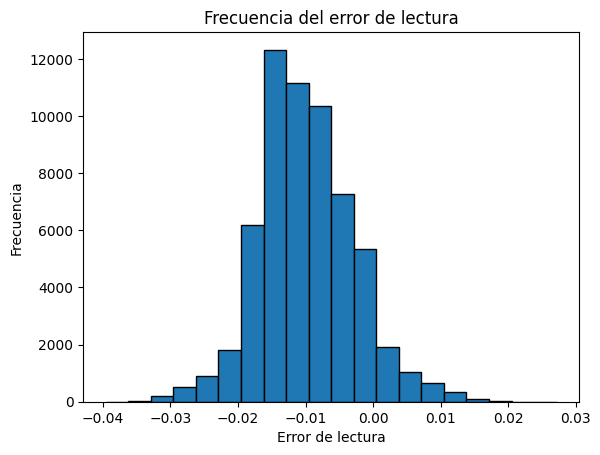

In [31]:
analog_data['error'] = analog_data['read_val'] - analog_data['ratio']

# Crear un histograma del tamaño del error
plt.hist(analog_data['error'], bins=20, edgecolor='black')
plt.title('Frecuencia del error de lectura')
plt.xlabel('Error de lectura')
plt.ylabel('Frecuencia')
plt.show()


# Reading error analysis by ratio
We will group every ratio and make a mean for the reading error.

In [37]:
def error_by_ratio(df, title):
    plt.plot(df['ratio'], df['error'])
    plt.ylabel('Media de Error')
    plt.xlabel('Ratio')
    plt.title(title)

### Reading error by ratio for all the different configs together

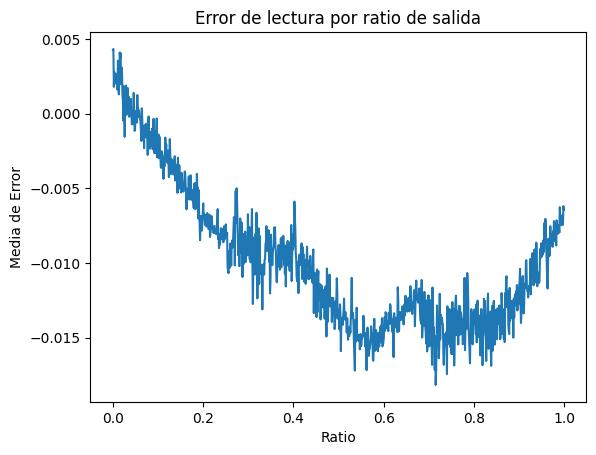

In [38]:
new_data = analog_data.groupby('ratio')['error'].mean().reset_index()
error_by_ratio(new_data, 'Error de lectura por ratio de salida')

### Comparison between percentual error by ratio for configs A and B

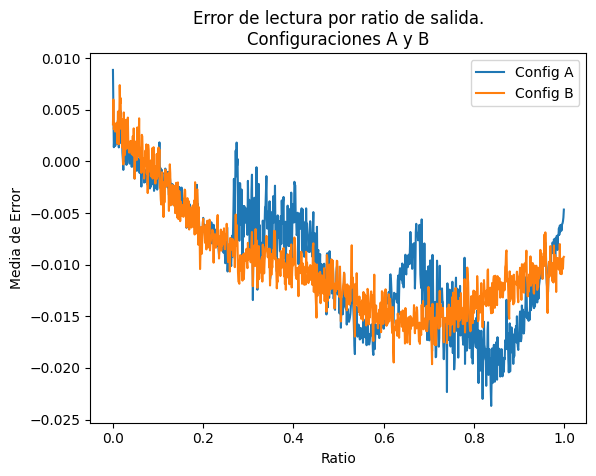

In [46]:
# Comparison between errors in config A and B
# Config A: Frequency IN = 5 kHz | Frequency OUT = 10 kHz
# Config B: Frequency IN = 10 kHz  | Frequency OUT = 10 kHz
analog_data_a = analog_data[(analog_data['frequency_out'] == 10000) & (analog_data['frequency_in'] == 5000)]
percentual_error_by_ratio_a = analog_data_a.groupby('ratio')['error'].mean().reset_index()
analog_data_b = analog_data[(analog_data['frequency_out'] == 10000) & (analog_data['frequency_in'] == 10000)]
percentual_error_by_ratio_b = analog_data_b.groupby('ratio')['error'].mean().reset_index()

# One is for config A and the other is for config B.
error_by_ratio(percentual_error_by_ratio_a, 'Error de lectura por ratio de salida.\nConfiguraciones A y B')
error_by_ratio(percentual_error_by_ratio_b, 'Error de lectura por ratio de salida.\nConfiguraciones A y B')
plt.legend(['Config A', 'Config B'], loc='upper right')


### Comparison between percentual error by ratio for configs B and C

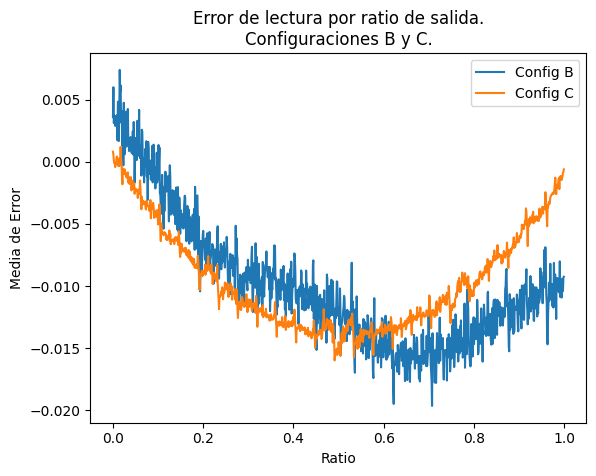

In [47]:
# Comparison between errors in config B and C
# Config B: Frequency IN = 10 kHz | Frequency OUT = 10 kHz
# Config C: Frequency IN = 20 kHz | Frequency OUT = 10 kHz
analog_data_c = analog_data[(analog_data['frequency_out'] == 10000) & (analog_data['frequency_in'] == 20000)]
percentual_error_by_ratio_c = analog_data_d.groupby('ratio')['error'].mean().reset_index()

# One is for config C and the other is for config D.
error_by_ratio(percentual_error_by_ratio_b, 'Error de lectura por ratio de salida.\nConfiguraciones B y C.')
error_by_ratio(percentual_error_by_ratio_c, 'Error de lectura por ratio de salida.\nConfiguraciones B y C.')
plt.legend(['Config B', 'Config C'], loc='upper right')

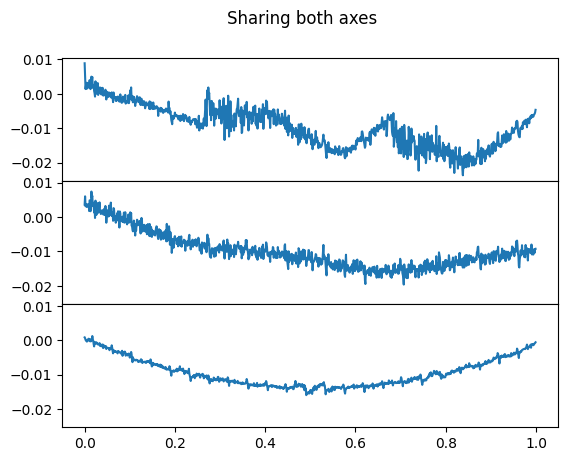

In [36]:
fig = plt.figure()
gs = fig.add_gridspec(3, hspace=0)
axs = gs.subplots(sharex=True, sharey=True)
fig.suptitle('Sharing both axes')

axs[0].plot(percentual_error_by_ratio_a['ratio'], percentual_error_by_ratio_a['error'])
axs[1].plot(percentual_error_by_ratio_b['ratio'], percentual_error_by_ratio_b['error'])
axs[2].plot(percentual_error_by_ratio_c['ratio'], percentual_error_by_ratio_c['error'])

# Hide x labels and tick labels for all but bottom plot.
for ax in axs:
    ax.label_outer()